# Programming Quantum Computers
- <font color="red">For the Software Engineer</font>

# Chapter Ch05_05
# <font color="red">Hands-on</font>:  <font color="blue">Quantum Conditional Phase Flip</font> 

### Encode the output of calculations into the relative phases of original qubit register
> - ### <font color="blue">Something completely impossible in the classical world.</font> 
> - ### <font color="blue">A crucial skill for programming QPU's.</font> 

![QC_Programming-red](img/QC_Programming-red.png "QC_Programming-red")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were created by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 

- Software engineers in the Quantum Computing space need to **<font color="blue">gain a mastery of the simulation frameworks and tools used to understand and solve problems quantumly</font>**. Under the hood, the **<font color="red">simulators mathematically represent the "Ideal" manifestations of quantum hardware</font>** that (theoretically) the "Actual" quantum hardware would behave exactly like. For the software engineer, this is the preferred situation as it permits them to understand and solve problems w/out being bound to the limitations of the hardware as it matures.


- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.


## Accompanying Text:

<BR>

<a href="https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683" target="_blank"><img src="img/OreillyBookImage-small.png" height="250" align=left style="padding:15px;"></a>


> The core materials leveraged in this Jupyter Notebook comes from the following book, and is required reading to engage in the problem sets covered.

> The problem sets contained here will be expanded versions of the exercises contained in the book for sake of gaining intuition about the particular concept in question through leveraging various 'other' frameworks, tools, and instruments indigenous to the quantum programming space. 


> The core idea is that the various "simulators" circuitry (underlying mathematical representations) is considered the "Ideal" at the time of this JNB's construction, and therefore are the bect tools we have to address the problems we are interested in. To avoid being constrained by any particular framework, tool set, and software instruments, the idea is to leverage a host of appropriate "tools" when addressing any particular concept, problem or issue to remaind technology agnostic, but concept and intuition rich.


- **Note:** The problems explored are organized and ordered according to chapter.

<BR>

**<font color="red" size=4>Notice</font>:** - Prior to embarking on this notebook the reader is **highly encouraged to procure a <font color="red" size=4>reasonable</font> <font color="blue" size=4>introduction</font>** to the following key programming (and circuit) frameworks used:

0. <a href="https://oreilly-qc.github.io/" target="_blank"><font color="blue" size=4>QCEngine</font></a>
0. <a href="https://qiskit.org/textbook/preface.html" target="_blank"><font color="blue" size=4>Qiskit Tutorial</font></a>, <a href="https://qiskit.org/" target="_blank"><font color="blue" size=4>Qiskit Home</font></a>
0. <a href="https://algassert.com/quirk" target="_blank"><font color="blue">QUIRK</font></a>

# <font color="red">Example Problem(s):</font> 

**This example problem is archetypal** of how the exercises highlighted in the book can be expanded to include a host of other tools that help build understanding and intuition of the concepts being explored. 

- The <font color="blue">QCEngine</font> is a staple, but the <font color="blue">Bloch Sphere Playground Application</font>, the <font color="blue">Quantum Gate Playground</font>, <font color="blue">QUIRK</font>, and <font color="blue">Qiskit</font> are also instructive to leverage when persuing intuition about the concept and will be often used.

# Quantum Conditional Phase Flip
> - Given the **Conditional Logic** of the circuit, only a specific part of the overall **Quantum State Space** gets affected (aka. has their phase changed), shown in red.

![Conditional Phase](img/conditional_phase.png "Conditional Phase")

<BR>
    
![Conditional Phase](img/ConditionalPhaseFlipCircuit.png "Conditional Phase")

<BR>


| KET | Phase | Reg's: A,B |
| --- | --- | --- |
| |8> | **<font color="red">0.354j</font>**	 |	**<font color="red">0,1</font>**
| |9> | **<font color="red">0.354j</font>**	 |	**<font color="red">1,1</font>**
| |10> | **<font color="red">(-0+0.354j)</font>** |	**<font color="red">2,1</font>**
| |11> | -0.354j	 |	3,1
| |24> | (-0-0.354j) |	0,3
| |25> | (-0-0.354j) |	1,3
| |26> | (-0-0.354j) |	2,2
| |27> | (-0-0.354j) |	3,3

<BR>

![Conditional Phase](img/ConditionalPhasePlipStateSpace1.png "Conditional Phase")

<BR>

#### <font color="blue">Circuit Implementation</font> - the below example implements the above circuit.
- **Copy and Run** the code base below and step through the circuit to gain intuition about its behavior.
- **Observe** the code that implements the QCEngine **<font color="red">Conditional Phase Change</font>** - **this is important to understand**..

> - Peruse the binary value of the various registers during the circuit flow and ovserve the corresponding circle plots of the specific kets that have their phases changed - make sure you understand what's happening.
> - You'll have to expand the circle plot pane to see all of the plots - there are two embedded panes to be expanded.

> ### <font color="red">Full Screen Mode</font>:

> - https://oreilly-qc.github.io?p=5-5

> ### <font color="red">Full Screen Mode</font>:

> - https://oreilly-qc.github.io?p=5-5

# <font color="blue">QCEngine</font>

In [1]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=5-5', width=900, height=900)

# <font color="blue">Qiskit</font> Run #1

- Execute the below circuit in Qiskit and observe the similarities between the returned **KET : PHASE** pairs and the **Table / Circle Plots** representing the state space below.
- Given the **Conditional Logic** of the circuit, only a specific part of the overall **Quantum State Space** gets affected (aka. has their phase changed), shown in red.



<BR>
    
![Conditional Phase](img/ConditionalPhaseFlipCircuit.png "Conditional Phase")

<BR>


| KET | Phase | Reg's: A,B |
| --- | --- | --- |
| |8> | **<font color="red">0.354j</font>**	 |	**<font color="red">0,1</font>**
| |9> | **<font color="red">0.354j</font>**	 |	**<font color="red">1,1</font>**
| |10> | **<font color="red">(-0+0.354j)</font>** |	**<font color="red">2,1</font>**
| |11> | -0.354j	 |	3,1
| |24> | (-0-0.354j) |	0,3
| |25> | (-0-0.354j) |	1,3
| |26> | (-0-0.354j) |	2,2
| |27> | (-0-0.354j) |	3,3

<BR>

![Conditional Phase](img/ConditionalPhasePlipStateSpace1.png "Conditional Phase")

<BR>

|8> 0.354j
|9> 0.354j
|10> (-0+0.354j)
|11> -0.354j
|24> (-0-0.354j)
|25> (-0-0.354j)
|26> (-0-0.354j)
|27> (-0-0.354j)


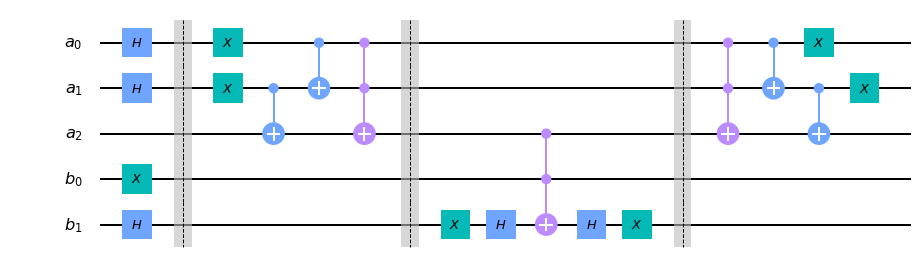

In [14]:
## Example 5-5: Quantum conditional phase flip

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
%matplotlib inline

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates

# Set up the program
a = QuantumRegister(3, name='a')
b = QuantumRegister(2, name='b')
qc = QuantumCircuit(a, b)

def main():
    ## initialization
    
    ## Register 'a'
    qc.h(a[0])
    qc.h(a[1])
    
    ## Register 'b'
    qc.x(b[0])
    qc.h(b[1])
    qc.barrier()
    
    ## Increment
    add_int(a, -3)
    qc.barrier()
    
    ## Phase Change
    qc.x(b[1])
    multi_cz([a[2], b[0], b[1]])
    qc.x(b[1])
    
    ## Add 3 to revert qubit to original state
    qc.barrier()
    add_int(a, 3)

###############################################
## Some utility functions

def add_squared_qint(qdest, rhs, condition_qubits=None):
    if condition_qubits is None:
        condition_qubits = []
    for bit in range(len(rhs)):
        slideMask = list(set(condition_qubits + [rhs[bit]]))
        add_qint(qdest, rhs, slideMask, bit);

def add_qint(qdest, rhs, condition_qubits=None, shiftRHS=0):
    if condition_qubits is None:
        condition_qubits = []
    for bit in range(len(rhs)):
        add_int(qdest, 1 << bit, list(set([rhs[bit]] + condition_qubits)), shiftRHS)

def add_int(qdest, rhs, condition_qubits=None, shiftRHS=0):
    if condition_qubits is None:
        condition_qubits = []
    reverse_to_subtract = False
    if rhs == 0:
        return
    elif rhs < 0:
        rhs = -rhs
        reverse_to_subtract = True
    rhs <<= shiftRHS
    ops = []
    add_val = int(rhs)
    condition_mask = (1 << len(qdest)) - 1

    add_val_mask = 1
    while add_val_mask <= add_val:
        cmask = condition_mask & ~(add_val_mask - 1)
        if add_val_mask & add_val:
            add_shift_mask = 1 << (len(qdest) - 1)
            while add_shift_mask >= add_val_mask:
                cmask &= ~add_shift_mask
                ops.append((add_shift_mask, cmask))
                add_shift_mask >>= 1
        condition_mask &= ~add_val_mask
        add_val_mask <<= 1
    if reverse_to_subtract:
        ops.reverse()
    for inst in ops:
        op_qubits = [x for x in condition_qubits]
        mask = 1
        for i in range(len(qdest)):
            if inst[1] & (1 << i):
                op_qubits.append(qdest[i])
        for i in range(len(qdest)):
            if inst[0] & (1 << i):
                op_qubits.append(qdest[i])
        multi_cx(op_qubits)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

main()

## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

outputstate = result.get_statevector(qc, decimals=3)


# Print the Ket / Phase Pairs:
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        print('|{}> {}'.format(i, amp))
        
        
# KET / Phase  Registers: A,B
# ----------------------------
# |8> 0.354j              0,1
# |9> 0.354j              1,1
# |10> (-0+0.354j)        2,1
# |11> -0.354j            3,1
# |24> (-0-0.354j)        0,3
# |25> (-0-0.354j)        1,3
# |26> (-0-0.354j)        2,2
# |27> (-0-0.354j)        3,3

qc.draw(output='mpl')        # draw the circuit



# <font color="blue">Qiskit</font> Run # 2

- Execute the same circuit as above, albit this time its broken up into its compoment parts - **use this codebase as inspiration for the HW.**
- Remind yourself of the important attributes of the previous run.




### <font color="blue">Misc Utility Functions</font>
#### <font color="red">NOTE</font>: Disregard the complexity of these helper functions - they can safely be ignored, just run them.

In [15]:
###############################################
## Some utility functions

def add_squared_qint(qdest, rhs, condition_qubits=None):
    if condition_qubits is None:
        condition_qubits = []
    for bit in range(len(rhs)):
        slideMask = list(set(condition_qubits + [rhs[bit]]))
        add_qint(qdest, rhs, slideMask, bit);

def add_qint(qdest, rhs, condition_qubits=None, shiftRHS=0):
    if condition_qubits is None:
        condition_qubits = []
    for bit in range(len(rhs)):
        add_int(qdest, 1 << bit, list(set([rhs[bit]] + condition_qubits)), shiftRHS)

def add_int(qdest, rhs, condition_qubits=None, shiftRHS=0):
    if condition_qubits is None:
        condition_qubits = []
    reverse_to_subtract = False
    if rhs == 0:
        return
    elif rhs < 0:
        rhs = -rhs
        reverse_to_subtract = True
    rhs <<= shiftRHS
    ops = []
    add_val = int(rhs)
    condition_mask = (1 << len(qdest)) - 1

    add_val_mask = 1
    while add_val_mask <= add_val:
        cmask = condition_mask & ~(add_val_mask - 1)
        if add_val_mask & add_val:
            add_shift_mask = 1 << (len(qdest) - 1)
            while add_shift_mask >= add_val_mask:
                cmask &= ~add_shift_mask
                ops.append((add_shift_mask, cmask))
                add_shift_mask >>= 1
        condition_mask &= ~add_val_mask
        add_val_mask <<= 1
    if reverse_to_subtract:
        ops.reverse()
    for inst in ops:
        op_qubits = [x for x in condition_qubits]
        mask = 1
        for i in range(len(qdest)):
            if inst[1] & (1 << i):
                op_qubits.append(qdest[i])
        for i in range(len(qdest)):
            if inst[0] & (1 << i):
                op_qubits.append(qdest[i])
        multi_cx(op_qubits)

def multi_cz(qubits):
    ## This will perform a CCCCCZ on as many qubits as we want,
    ## as long as we have enough scratch qubits
    multi_cx(qubits, do_cz=True)

def multi_cx(qubits, do_cz=False):
    ## This will perform a CCCCCX with as many conditions as we want,
    ## as long as we have enough scratch qubits
    ## The last qubit in the list is the target.
    target = qubits[-1]
    conds = qubits[:-1]
    scratch_index = 0
    ops = []
    while len(conds) > 2:
        new_conds = []
        for i in range(len(conds)//2):
            ops.append((conds[i * 2], conds[i * 2 + 1], scratch[scratch_index]))
            new_conds.append(scratch[scratch_index])
            scratch_index += 1
        if len(conds) & 1:
            new_conds.append(conds[-1])
        conds = new_conds
    for op in ops:
        qc.ccx(op[0], op[1], op[2])
    if do_cz:
        qc.h(target)
    if len(conds) == 0:
        qc.x(target)
    elif len(conds) == 1:
        qc.cx(conds[0], target)
    else:
        qc.ccx(conds[0], conds[1], target)
    if do_cz:
        qc.h(target)
    ops.reverse()
    for op in ops:
        qc.ccx(op[0], op[1], op[2])

### <font color="blue">Setup and Q_Circuit Design</font>

In [16]:
## Example 5-5: Quantum conditional phase flip

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

## Note that this looks different from the gates in the book, because
## we're building the operations from Toffoli gates

# Set up the program
a = QuantumRegister(3, name='a')
b = QuantumRegister(2, name='b')
qc = QuantumCircuit(a, b)


### <font color="blue">Define Main FN and </font> **<font color="red">Conditional Phase</font>**  Operators  + Ordering of Execution
- This exercise permits an interesting (and non-obvious)] insight into how QISKIT loads operators onto it's execution stack - **LIFO** (LAST in FIRST Out) and the **stack gets executed in that order**.

In [17]:
def main():
    ## initialization
    
    ## Register 'a'
    qc.h(a[0])
    qc.h(a[1])
    
    ## Register 'b'
    qc.x(b[0])
    qc.h(b[1])
    qc.barrier()
    
    ## Increment
    add_int(a, -3)
    qc.barrier()
    
    ## Conditional Phase Change
    qc.x(b[1])
    multi_cz([a[2], b[0], b[1]])
    qc.x(b[1])
    
    ## Add 3 to revert qubit to original state
    qc.barrier()
    add_int(a, 3)
    

### <font color="blue">Execute Main FN </font>

In [18]:
main()

### <font color="blue">Submit the Job to the SImulator Backend </font>

In [19]:
## That's the program. Everything below runs and draws it.

backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

### <font color="blue">Printout Quantum Registers and Circuit</font>
- Match **this KET list** with the **QCEngine KET list** and compare with the circle plots below.

<BR>
    
| KET | Phase | Reg's: A,B |
| --- | --- | --- |
| |8> | **<font color="red">0.354j</font>**	 |	**<font color="red">0,1</font>**
| |9> | **<font color="red">0.354j</font>**	 |	**<font color="red">1,1</font>**
| |10> | **<font color="red">(-0+0.354j)</font>** |	**<font color="red">2,1</font>**
| |11> | -0.354j	 |	3,1
| |24> | (-0-0.354j) |	0,3
| |25> | (-0-0.354j) |	1,3
| |26> | (-0-0.354j) |	2,2
| |27> | (-0-0.354j) |	3,3

<BR>

![Conditional Phase](img/ConditionalPhasePlipStateSpace1.png "Conditional Phase")

<BR>

In [20]:
outputstate = result.get_statevector(qc, decimals=3)
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        print('|{}> {}'.format(i, amp))


|8> 0.354j
|9> 0.354j
|10> (-0+0.354j)
|11> -0.354j
|24> (-0-0.354j)
|25> (-0-0.354j)
|26> (-0-0.354j)
|27> (-0-0.354j)


### <font color="blue">Print out the QISKIT Circle Plots for intuition </font>
- The font is a bit small, but you can verify with a simple count of the circles.

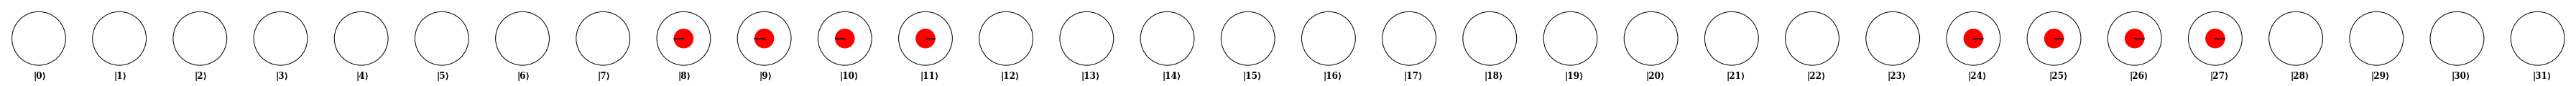

In [21]:
# Print out Circle Notation for intuitions sake

from circle_plot import *
plot_circles(outputstate)

### <font color="blue">Print Bloch Spheres for intuition </font>
- Note the **phase change** of each as we **encode information and calculate** using **phases**.

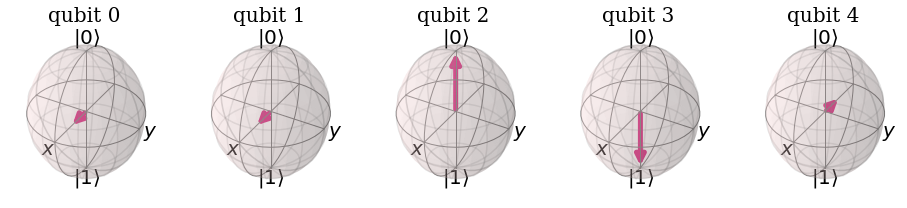

In [22]:
# Plot the state vector on a Bloch sphere

from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(outputstate)

### <font color="blue">Draw the Circuit </font>

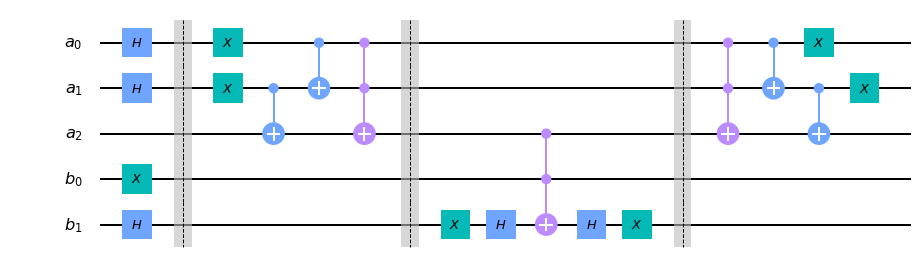

In [11]:
qc.draw(output='mpl')        # draw the circuit

# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>

#### In the previous QCEngine / Qiskit example(s), you explored the circuit described below.

- You then used the  **<font color="red">Conditional Phase Change</font>** Operators as follows:

### **<font color="blue">Conditional Phase Change Operator Behavior</font>**: 

<BR>
    
![Conditional Phase](img/conditional_phase.png "Conditional Phase")


<BR>
    
> ### Given the above as inspiration, create the following in **<font color="red">both</font> QCEngine / Qiskit** :
- Construct the circuit below modeling it closely after the code bases in **<font color="red">both</font> QCEngine / Qiskit** that you have been working with.
> - **HINTs**: 
- it only requires small modifications in the code but you'll have to follow the execution closely and understand what it does.
- Examine the circuit closely - there are only minor changes from the original code base.
- Look for the highlighted regions below.


<BR>


![Conditional Phase](img/ConditionalPhaseFlipCircuit-HW.png "Conditional Phase")


<BR>

<**For Reference**:
    
![Conditional Phase](img/ConditionalPhaseFlipCircuit.png "Conditional Phase")

<BR>


##  <font color="blue">Your QCEngine Code Base goes below:</font>
- Use the Reads of the Measurements in the simulator to better follow the execution flow as in the examples.

##  <font color="blue">Your QISKIT Code Base goes below:</font>

![the-end](img/the-end.png "the-end")